In [1]:
import matplotlib.pyplot as mp
import read_dao
import sys
import coordinates
import numpy as np
from matplotlib.ticker import ScalarFormatter
from astropy.wcs import WCS
import optical
%matplotlib inline 

In [2]:
target = 'NGC3201'
folder = '/Users/jrneeley/CRRP/'+target+'/'
channel = 'I1'
optical_folder = '/Users/jrneeley/CRRP/OpticalCatalogs/'

In [3]:
dtype1 = np.dtype([('img', 'S23'), ('ra', float), ('dec', float)])
data = np.loadtxt(folder+channel+'_centers.txt', dtype=dtype1, usecols=(0,1,2))

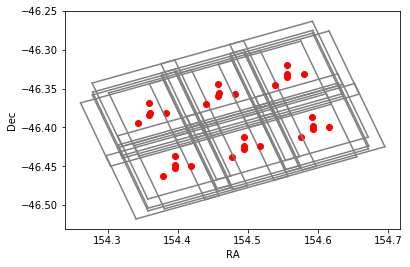

In [4]:
for ind, fits_file in enumerate(data['img']):
    w = WCS(folder+fits_file)
    ra1, dec1 = w.wcs_pix2world(1, 1, 0)
    ra2, dec2 = w.wcs_pix2world(1, 256, 0)
    ra3, dec3 = w.wcs_pix2world(256, 256, 0)
    ra4, dec4 = w.wcs_pix2world(256, 1, 0)



# Plot AOR footprint
    mp.plot(data['ra'][ind], data['dec'][ind], 'ro')
    mp.plot([ra1, ra2], [dec1, dec2], '-', color='0.5')
    mp.plot([ra2, ra3], [dec2, dec3], '-', color='0.5')
    mp.plot([ra3, ra4], [dec3, dec4], '-', color='0.5')
    mp.plot([ra4, ra1], [dec4, dec1], '-', color='0.5')
mp.xlabel('RA')
mp.ylabel('Dec')

x_formatter = ScalarFormatter(useOffset=False)
mp.gca().xaxis.set_major_formatter(x_formatter)
mp.show()

Reading optical catalog for NGC3201...
Finished reading optical catalog.


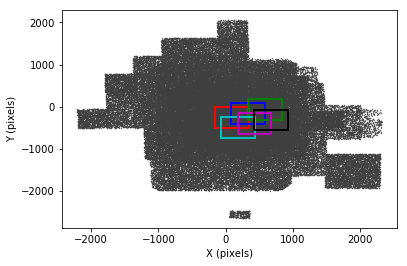

In [5]:
# Map of source catalog with field boundaries shown

ids, xcat, ycat, ra, dec = optical.read_optical_fnl(optical_folder, target)

dtype1 = np.dtype([('xmin', float), ('xmax', float), ('ymin', float), ('ymax', float)])
cuts = np.loadtxt(folder+channel+'-catalog-cuts.txt', dtype=dtype1, usecols=(1,2,3,4))

mp.plot(xcat, ycat, '.', color='0.25', markersize=0.75)
colors=['r', 'b', 'g', 'c', 'm', 'k']
for ind in range(len(cuts['xmin'])):
    mp.plot([cuts['xmin'][ind], cuts['xmax'][ind]], [cuts['ymin'][ind], cuts['ymin'][ind]],
        '-', color=colors[ind], linewidth=2)
    mp.plot([cuts['xmin'][ind], cuts['xmax'][ind]], [cuts['ymax'][ind], cuts['ymax'][ind]],
        '-', color=colors[ind], linewidth=2)
    mp.plot([cuts['xmin'][ind], cuts['xmin'][ind]], [cuts['ymin'][ind], cuts['ymax'][ind]],
        '-', color=colors[ind], linewidth=2)
    mp.plot([cuts['xmax'][ind], cuts['xmax'][ind]], [cuts['ymin'][ind], cuts['ymax'][ind]],
        '-', color=colors[ind], linewidth=2)
mp.xlabel('X (pixels)')
mp.ylabel('Y (pixels)')
mp.show()


In [6]:
# Add on transformed catalogs

for ind in range(len(cuts['xmin'])):
    IRids, IRx, IRy, IRmag, IRerr = read_dao.read_mag(channel+'_field'+str(ind+1)+'.mag')
    files, x_off, y_off, transform, dof = read_dao.read_mch('op-'+channel+'-f'+str(ind+1)+'.mch')
    x = float(x_off[1])+float(transform[1][0])*IRx+float(transform[1][1])*IRy
    y = float(y_off[1])+float(transform[1][2])*IRx+float(transform[1][3])*IRy
    mp.plot(x, y, '.', markersize=1.8, color=colors[ind])
mp.show()

IOError: [Errno 2] No such file or directory: 'I1_field1.mag'